In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('StudentsPerformance_modified.csv')

In [3]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [6]:
df['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: object

In [8]:
df['math score']=pd.to_numeric(df['math score'],errors='coerce')

In [9]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [10]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [11]:
df['math score'].fillna(df['math score'].mean(),inplace=True)
df['reading score'].fillna(df['reading score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].mean(),inplace=True)

In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [15]:
columns = []
for cols in df.columns:
    columns.append(cols)
    

In [16]:
columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [18]:
df.dtypes


gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

<Axes: >

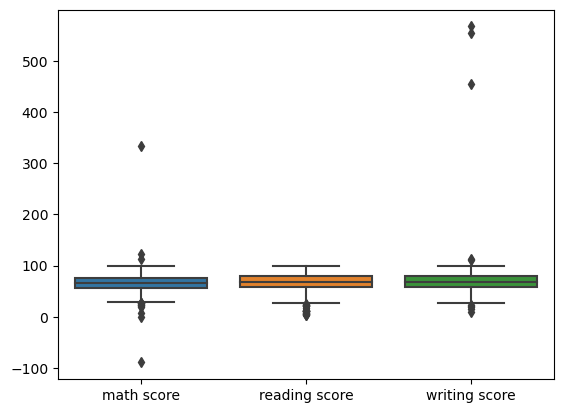

In [21]:
sns.boxplot(df[['math score','reading score','writing score']])

In [22]:
q1 = df.quantile(0.25,numeric_only=True)
q3 = df.quantile(0.75,numeric_only=True)
IQR = q3 - q1
ul = q3 + (1.5*IQR)
ll = q1 - (1.5*IQR)

In [23]:
df['math score'][(df['math score']<ll['math score'])]=df['math score'].median()

/tmp/ipykernel_4563/4092122203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][(df['math score']<ll['math score'])]=df['math score'].median()


In [25]:
df['math score'][(df['math score']>ul['math score'])]=df['math score'].median()

/tmp/ipykernel_4563/345648971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][(df['math score']>ul['math score'])]=df['math score'].median()


<Axes: >

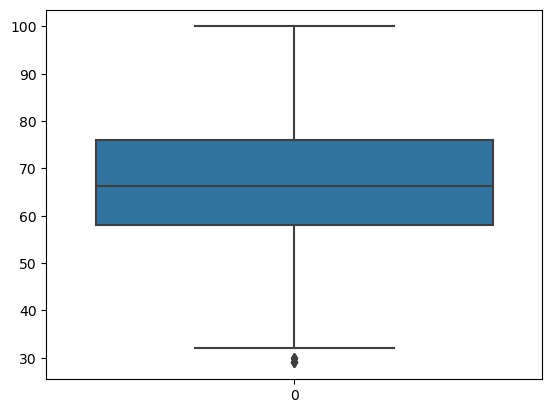

In [26]:
sns.boxplot(df['math score'])

In [27]:
df['reading score'][(df['reading score']<ll['reading score'])]=df['reading score'].median()

/tmp/ipykernel_4563/2249993318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][(df['reading score']<ll['reading score'])]=df['reading score'].median()


In [28]:
df['reading score'][(df['reading score']>ul['reading score'])]=df['reading score'].median()

/tmp/ipykernel_4563/3216615756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][(df['reading score']>ul['reading score'])]=df['reading score'].median()


In [29]:
df['writing score'][(df['writing score']<ll['writing score'])]=df['writing score'].median()

/tmp/ipykernel_4563/1743390277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'][(df['writing score']<ll['writing score'])]=df['writing score'].median()


In [30]:
df['writing score'][(df['writing score']>ul['writing score'])]=df['writing score'].median()

/tmp/ipykernel_4563/864560634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'][(df['writing score']>ul['writing score'])]=df['writing score'].median()


<Axes: >

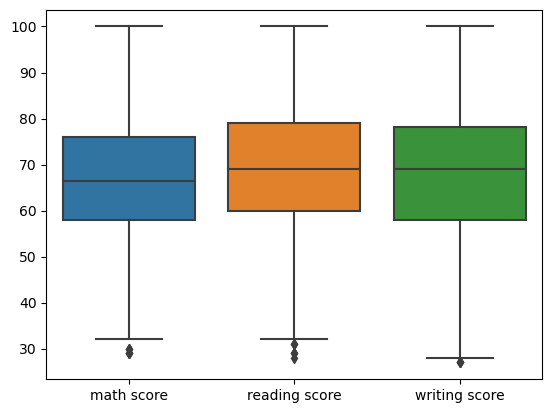

In [31]:
sns.boxplot(df[['math score','reading score','writing score']])

In [32]:
q1=df.quantile(0.25,numeric_only=True)

In [33]:
q3=df.quantile(0.75,numeric_only=True)
IQR=q3-q1
ul=q3+(1.5*IQR)
ll=q1-(1.5*IQR)

In [35]:
df['math score'][(df['math score']<ll['math score'])]=df['math score'].median()

/tmp/ipykernel_4563/4092122203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][(df['math score']<ll['math score'])]=df['math score'].median()


In [36]:
df['math score'][(df['math score']>ul['math score'])]=df['math score'].median()

/tmp/ipykernel_4563/345648971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][(df['math score']>ul['math score'])]=df['math score'].median()


In [38]:
df['reading score'][(df['reading score']<ll['reading score'])]=df['reading score'].median()

/tmp/ipykernel_4563/2249993318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][(df['reading score']<ll['reading score'])]=df['reading score'].median()


In [39]:
df['reading score'][(df['reading score']>ul['reading score'])]=df['reading score'].median()

/tmp/ipykernel_4563/3216615756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][(df['reading score']>ul['reading score'])]=df['reading score'].median()


In [40]:
df['writing score'][(df['writing score']<ll['writing score'])]=df['writing score'].median()

/tmp/ipykernel_4563/1743390277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'][(df['writing score']<ll['writing score'])]=df['writing score'].median()


In [41]:
df['writing score'][(df['writing score']>ul['writing score'])]=df['writing score'].median()

/tmp/ipykernel_4563/864560634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'][(df['writing score']>ul['writing score'])]=df['writing score'].median()


<Axes: >

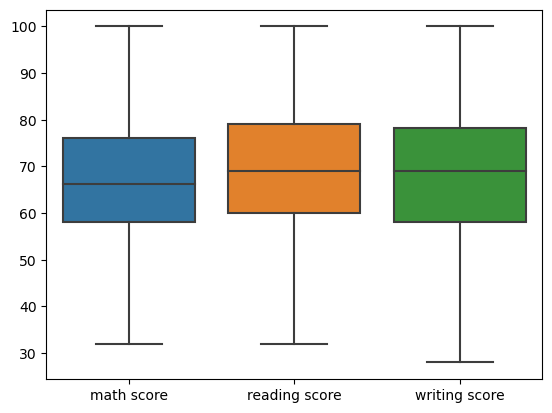

In [42]:
sns.boxplot(df[['math score','reading score','writing score']])

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for columns in df.columns:
    if df[columns].dtypes=="object":
        df[columns]=labelencoder.fit_transform(df[columns])

In [45]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72.0,72.0,74.0
1,0,2,4,1,0,69.0,90.0,88.0
2,0,1,3,1,1,90.0,95.0,93.0
3,1,0,0,0,1,47.0,57.0,44.0
4,1,2,4,1,1,76.0,78.0,75.0


In [46]:
df.dtypes

gender                           int64
race/ethnicity                   int64
parental level of education      int64
lunch                            int64
test preparation course          int64
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [49]:
columns=[]
for column in df.columns:
    columns.append(column)
columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
new_df=scaler.fit_transform(df)
new_df=pd.DataFrame(new_df,columns=columns)

In [51]:
new_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,0.25,0.2,1.0,1.0,0.588235,0.588235,0.638889
1,0.0,0.50,0.8,1.0,0.0,0.544118,0.852941,0.833333
2,0.0,0.25,0.6,1.0,1.0,0.852941,0.926471,0.902778
3,1.0,0.00,0.0,0.0,1.0,0.220588,0.367647,0.222222
4,1.0,0.50,0.8,1.0,1.0,0.647059,0.676471,0.652778
...,...,...,...,...,...,...,...,...
995,0.0,1.00,0.6,1.0,0.0,0.823529,0.985294,0.930556
996,1.0,0.50,0.4,0.0,1.0,0.441176,0.338235,0.375000
997,0.0,0.50,0.4,0.0,0.0,0.397059,0.573529,0.513889
998,0.0,0.75,0.8,1.0,0.0,0.529412,0.676471,0.680556
